# Lab 3

## Imports

In [1]:
import numpy as np
import pandas as pd
from os import path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow import data as tf_data
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0

## TASK 2.b. Convolutional Neural Networks (Transfer learning from pre-trained weights)

In [2]:
image_size = (224, 224)
batch_size = 64

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1212 files belonging to 5 classes.
Using 970 files for training.
Using 242 files for validation.


In [3]:
num_classes = 5

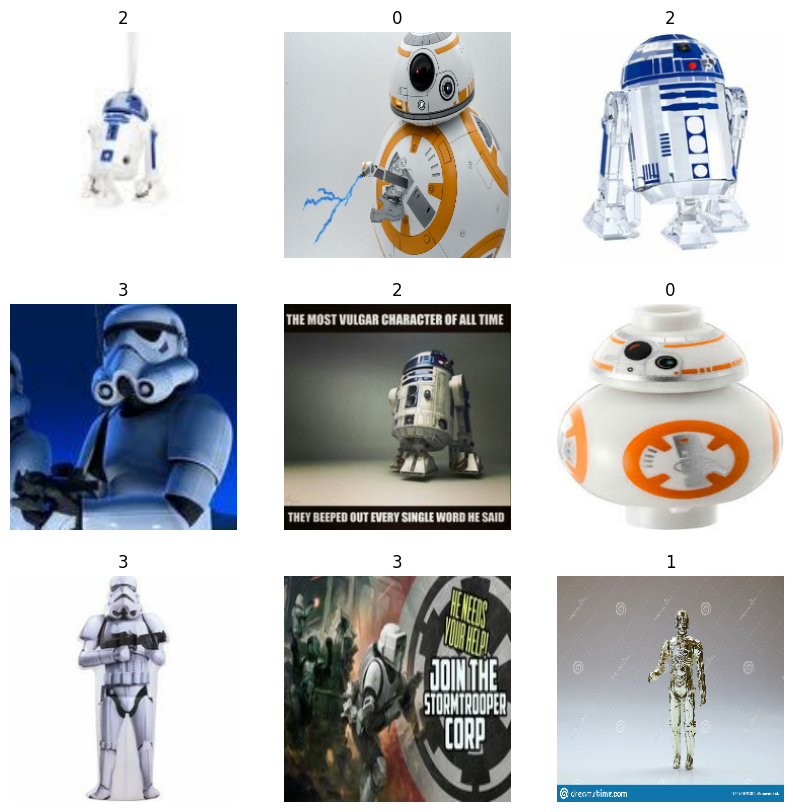

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

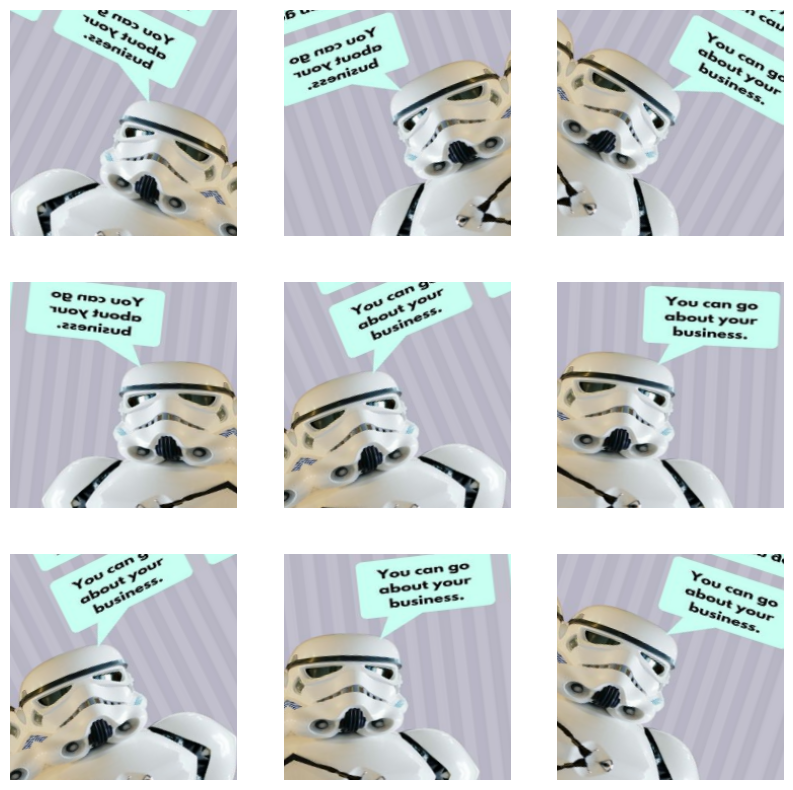

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [7]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)

In [8]:
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [9]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [10]:
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,366,440 (20.47 MB)

 Trainable params: 1,316,869 (5.02 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [13]:
epochs = 8

In [14]:
history = model.fit(
    train_ds, 
    epochs=epochs, 
    validation_data=val_ds,
    verbose=1,
)

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 519ms/step - accuracy: 0.6619 - loss: 0.8581 - val_accuracy: 0.9132 - val_loss: 0.1923
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.9289 - loss: 0.1748 - val_accuracy: 0.9215 - val_loss: 0.1789
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9699 - loss: 0.0991 - val_accuracy: 0.9380 - val_loss: 0.1410
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.9735 - loss: 0.0847 - val_accuracy: 0.9298 - val_loss: 0.1666
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 435ms/step - accuracy: 0.9802 - loss: 0.0638 - val_accuracy: 0.9298 - val_loss: 0.1413
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - accuracy: 0.9890 - loss: 0.0382 - val_accuracy: 0.9463 - val_loss: 0.1524
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.9853 - loss: 0.0426 - val_accuracy: 0.9421 - val_loss: 0.1481
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 442ms/step - accuracy: 0.9954 - loss: 0.0187 - val_accuracy: 0.9504 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

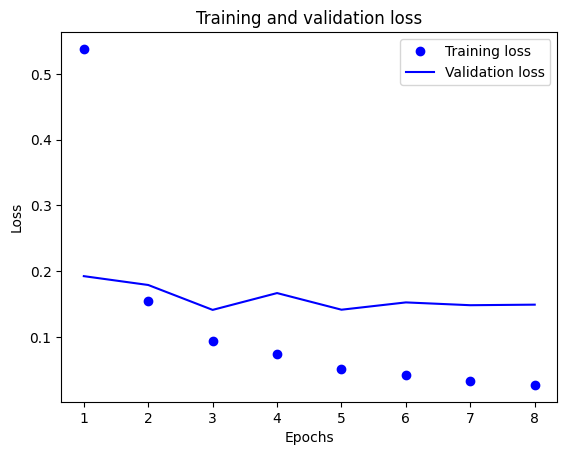

In [16]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
test_ds = keras.utils.image_dataset_from_directory(
    "validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 315 files belonging to 5 classes.


In [18]:
score = model.evaluate(test_ds, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.22525303065776825
Test accuracy: 0.9523809552192688


> So, when using convolutional neural networks for image classification, I concluded that they are effective for image recognition tasks. Although it might seem not very complicated from the outside, assembling the model and considering all the nuances is challenging.
One thing I can highlight is the training time for the model from scratch — it’s a nightmare. I’m using TensorFlow without GPU and CUDA support, only on the CPU. And the model trains very slowly. This is especially noticeable when the image size is relatively large, for example, 224x224. Each epoch takes around 2-3 minutes (and I have a powerful processor).
On the other hand, when using pre-trained weights, the model trains much faster and the result is significantly better: 90% from scratch and 95% with pre-trained weights. However, there are limitations with specific models on the input image size; for example, EfficientNetB0 has a limit of 224x224.

> Continue in the file lab3_3.ipynb